In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import censusdata as cd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import contextily as cx
from sridentify import Sridentify
import statistics
plt.style.use('ggplot')

us_state_abbrev = {'the United States':'US','Alabama': 'AL','Alaska': 'AK','American Samoa': 'AS','Arizona': 'AZ',
'Arkansas': 'AR','California': 'CA','Colorado': 'CO', 'Connecticut': 'CT','Delaware': 'DE','District of Columbia': 'DC',
 'Florida': 'FL','Georgia': 'GA','Guam': 'GU','Hawaii': 'HI', 'Idaho': 'ID','Illinois': 'IL','Indiana': 'IN',
 'Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA', 'Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA',
 'Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO', 'Montana': 'MT','Nebraska': 'NE','Nevada': 'NV',
 'New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC', 
 'North Dakota': 'ND','Northern Mariana Islands':'MP','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR',
 'Pennsylvania': 'PA','Puerto Rico': 'PR', 'Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD',
 'Tennessee': 'TN','Texas': 'TX','Utah': 'UT', 'Vermont': 'VT','Virgin Islands': 'VI','Virginia': 'VA',
 'Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

state_codes = {'WA': '53', 'DE': '10', 'DC': '11', 'WI': '55', 'WV': '54', 'HI': '15','FL': '12', 'WY': '56', 'PR': '72', 'NJ': '34', 'NM': '35', 'TX': '48',
    'LA': '22', 'NC': '37', 'ND': '38', 'NE': '31', 'TN': '47', 'NY': '36','PA': '42', 'AK': '02', 'NV': '32', 'NH': '33', 'VA': '51', 'CO': '08',
    'CA': '06', 'AL': '01', 'AR': '05', 'VT': '50', 'IL': '17', 'GA': '13','IN': '18', 'IA': '19', 'MA': '25', 'AZ': '04', 'ID': '16', 'CT': '09',
    'ME': '23', 'MD': '24', 'OK': '40', 'OH': '39', 'UT': '49', 'MO': '29','MN': '27', 'MI': '26', 'RI': '44', 'KS': '20', 'MT': '30', 'MS': '28',
    'SC': '45', 'KY': '21', 'OR': '41', 'SD': '46'}

state_to_crs = {'WA': 'EPSG:2285', 'DE': 'EPSG:2235', 'DC': 'EPSG:2283', 'WI': 'EPSG:2288', 'WV': 'EPSG:2857', 'HI': 'EPSG:2786','FL': 'EPSG:2778', 'WY': 'EPSG:2863', 
               'PR': 'EPSG:2866', 'NJ': 'EPSG:2824', 'NM': 'EPSG:2258', 'TX': 'EPSG:2277','LA': 'EPSG:2801', 'NC': 'EPSG:2264', 
               'ND': 'EPSG:2266', 'NE': 'EPSG:2819','TN': 'EPSG:2204', 'NY': 'EPSG:2261','PA': 'EPSG:2272', 'AK': 'EPSG:3467', 
                'NV': 'EPSG:2821', 'NH': 'EPSG:2823', 'VA': 'EPSG:2284', 'CO': 'EPSG:2232','CA': 'EPSG:2769', 'AL': 'EPSG:2759',  'AR': 'EPSG:2765', 'VT': 'EPSG:2852', 'IL': 'EPSG:2790', 
               'GA': 'EPSG:2239','IN': 'EPSG:2244','IA': 'EPSG:2795', 'MA': 'EPSG:2249','AZ': 'EPSG:2223', 'ID': 'EPSG:2242', 'CT': 'EPSG:2775','ME': 'EPSG:2802', 'MD': 'EPSG:2804', 'OK': 'EPSG:2268', 
               'OH': 'EPSG:2835', 'UT': 'EPSG:2280','MO': 'EPSG:2816','MN': 'EPSG:2811', 'MI': 'EPSG:2252', 'RI': 'EPSG:2840', 'KS': 'EPSG:2796', 'MT': 'EPSG:2256', 
               'MS': 'EPSG:2254','SC': 'EPSG:2273', 'KY': 'EPSG:2205', 'OR': 'EPSG:2991', 'SD': 'EPSG:2266'}

states = ["AL", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", 
          "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", 
          "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [21]:
#Enter survey:
survey = 'acs5'
#Enter year:
year = 2019
#Enter Search Term:
search_term = 'heating'
my_search = cd.search(survey, year, 'concept', search_term)
print(my_search)

[('B25040_001E', 'HOUSE HEATING FUEL', 'Estimate!!Total:'), ('B25040_002E', 'HOUSE HEATING FUEL', 'Estimate!!Total:!!Utility gas'), ('B25040_003E', 'HOUSE HEATING FUEL', 'Estimate!!Total:!!Bottled, tank, or LP gas'), ('B25040_004E', 'HOUSE HEATING FUEL', 'Estimate!!Total:!!Electricity'), ('B25040_005E', 'HOUSE HEATING FUEL', 'Estimate!!Total:!!Fuel oil, kerosene, etc.'), ('B25040_006E', 'HOUSE HEATING FUEL', 'Estimate!!Total:!!Coal or coke'), ('B25040_007E', 'HOUSE HEATING FUEL', 'Estimate!!Total:!!Wood'), ('B25040_008E', 'HOUSE HEATING FUEL', 'Estimate!!Total:!!Solar energy'), ('B25040_009E', 'HOUSE HEATING FUEL', 'Estimate!!Total:!!Other fuel'), ('B25040_010E', 'HOUSE HEATING FUEL', 'Estimate!!Total:!!No fuel used'), ('B25117_001E', 'TENURE BY HOUSE HEATING FUEL', 'Estimate!!Total:'), ('B25117_002E', 'TENURE BY HOUSE HEATING FUEL', 'Estimate!!Total:!!Owner occupied:'), ('B25117_003E', 'TENURE BY HOUSE HEATING FUEL', 'Estimate!!Total:!!Owner occupied:!!Utility gas'), ('B25117_004E', '

In [2]:
def get_census_tract_acs_data(codes, labels, state, county='*', tract='*', survey='acs5', year=2015):
    df = cd.download(survey, year, cd.censusgeo([('state', state), ('county', county),  ('tract', tract)]), codes)
    df.columns = labels
    fips, counties, states, tracts = [], [], [], []
    for i in df.index:
        fips.append(i.geo[0][1] + i.geo[1][1] + i.geo[2][1])
        tracts.append(i.geo[2][1])
        myidx = i.name.split(',')
        counties.append(myidx[1])
        states.append(myidx[2])
    df = df.reset_index()
    df = df.drop(columns=['index'])
    df2 = pd.DataFrame({'State':states, 'County':counties, 'FIPS':fips,'Tract':tracts})
    df_out = pd.concat([df2, df], axis=1).sort_values(by=['State','County','FIPS', 'Tract']).reset_index(drop=True)
    return df_out

In [3]:
codes = ['B25002_002E','B25040_002E']
labels = ['Occupied Housing Units','Gas Heated Units']

In [5]:
ct = gpd.GeoDataFrame(gpd.read_file('../Static/GIS_Data/cb_2019_us_tract_500k/cb_2019_us_tract_500k.shp'))
ct.crs = 'EPSG:4269'

In [29]:
ct.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,34,005,702808,1400000US34005702808,34005702808,7028.08,CT,1510553,0,"POLYGON ((-74.90801 40.03250, -74.90496 40.036..."
1,39,153,504200,1400000US39153504200,39153504200,5042,CT,808151,0,"POLYGON ((-81.51807 41.05957, -81.51805 41.062..."
2,36,071,000502,1400000US36071000502,36071000502,5.02,CT,967431,969216,"POLYGON ((-74.02226 41.49281, -74.02180 41.496..."
3,06,013,370000,1400000US06013370000,06013370000,3700,CT,999356,0,"POLYGON ((-122.32697 37.93502, -122.32610 37.9..."
4,48,113,019204,1400000US48113019204,48113019204,192.04,CT,2851229,9966,"POLYGON ((-96.76902 32.94655, -96.76899 32.950..."


In [32]:
df['FIPS'][0]

'36001000100'

In [35]:
def get_state_units(sa):
    df = get_census_tract_acs_data(codes, labels, state_codes[sa], county='*', tract='*', survey='acs5', year=2019)
    pct_gas = [0 for _ in df.index]
    for i in df.index:
        try:
            pct_gas[i] = round(df['Gas Heated Units'][i]/df['Occupied Housing Units'][i],4)
        except:
            None
    df['Percent Gas'] = pct_gas

    geoid_to_pct_gas = dict()
    for i in df.index:
        geoid_to_pct_gas[str(df['FIPS'][i])] = df['Percent Gas'][i]
    
    ct_temp = ct[ct.STATEFP==state_codes[sa]].reset_index(drop=True)
    
    ct_pct_gas = [0 for _ in ct_temp.index]
    for i in ct_temp.index:
        ct_pct_gas[i] = geoid_to_pct_gas[ct_temp['GEOID'][i]]
    ct_temp['Percent Gas'] = ct_pct_gas
    
    return ct_temp

In [53]:
year = 2019
sa = 'MA'
ct_temp = get_state_units(sa,year=year)
ct_temp = ct_temp.to_crs(state_to_crs[sa])

/Users/ryaniyer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


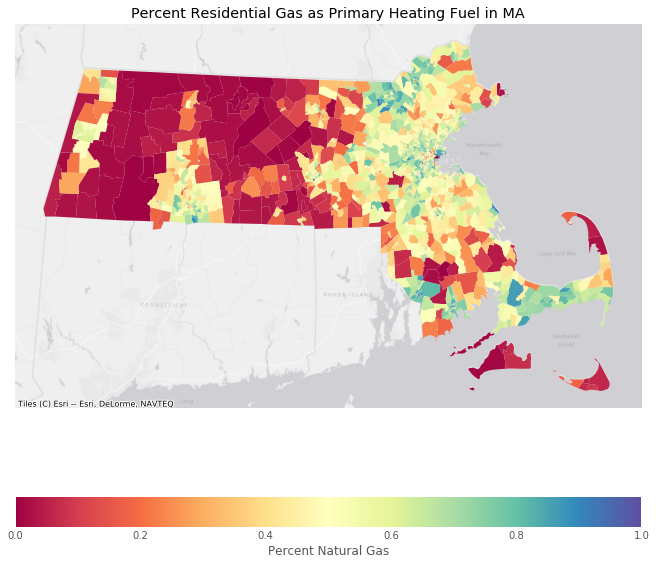

In [55]:
plt.style.use('ggplot')
ax = ct_temp.plot(figsize=(10,10), cmap='Spectral',column='Percent Gas', legend=True,
                 legend_kwds={'label': "Percent Natural Gas",'orientation': "horizontal"})
ax.axis('off')
ax.set_title('Percent Residential Gas as Primary Heating Fuel in '+sa+', '+year)
cx.add_basemap(ax,  crs=ct_temp.crs.to_string(), source=cx.providers.Esri.WorldGrayCanvas)